In [1]:
#import all necssary libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Read the file
milk=pd.read_csv('/content/milknew.csv')

In [3]:
milk.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


**Data Pre-Processing**

In [4]:
#checking null values
milk.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [5]:
#checking duplicated
milk.duplicated().sum()

976

In [6]:
milk.drop_duplicates(inplace=True)

In [7]:
milk.shape

(83, 8)

In [8]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, 0 to 998
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          83 non-null     float64
 1   Temprature  83 non-null     int64  
 2   Taste       83 non-null     int64  
 3   Odor        83 non-null     int64  
 4   Fat         83 non-null     int64  
 5   Turbidity   83 non-null     int64  
 6   Colour      83 non-null     int64  
 7   Grade       83 non-null     object 
dtypes: float64(1), int64(6), object(1)
memory usage: 5.8+ KB


In [9]:
milk.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,6.668675,43.698795,0.493976,0.397590,0.602410,0.433735,251.313253
std,0.986856,9.379187,0.503003,0.492375,0.492375,0.498602,4.577058
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,247.000000
50%,6.600000,41.000000,0.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [10]:
imp_features1=['Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']

**Data-Analysis**

<ipython-input-11-1e66d9dacb85>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=milk, x=feature, palette='viridis')
<ipython-input-11-1e66d9dacb85>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=milk, x=feature, palette='viridis')
<ipython-input-11-1e66d9dacb85>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=milk, x=feature, palette='viridis')
<ipython-input-11-1e66d9dacb85>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` an

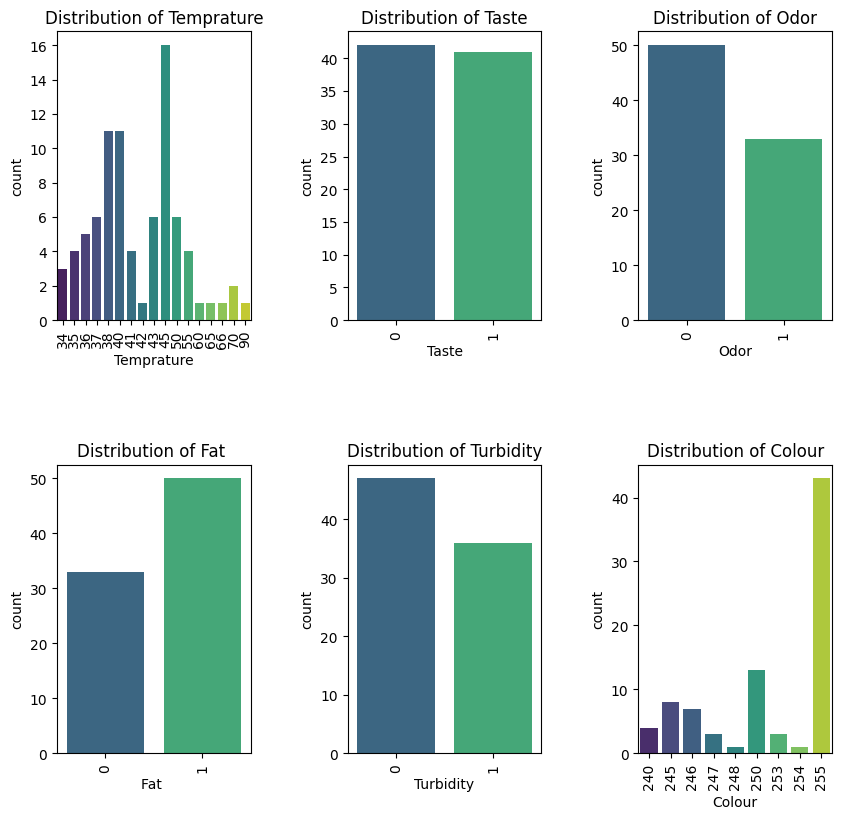

In [11]:
plt.figure(figsize=(10,15))
for i, feature in enumerate(imp_features1, 1):
    plt.subplot(3, 3, i)  # 3 rows, 3 columns
    sns.countplot(data=milk, x=feature, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=90)

plt.subplots_adjust(hspace=0.5,wspace=0.5)

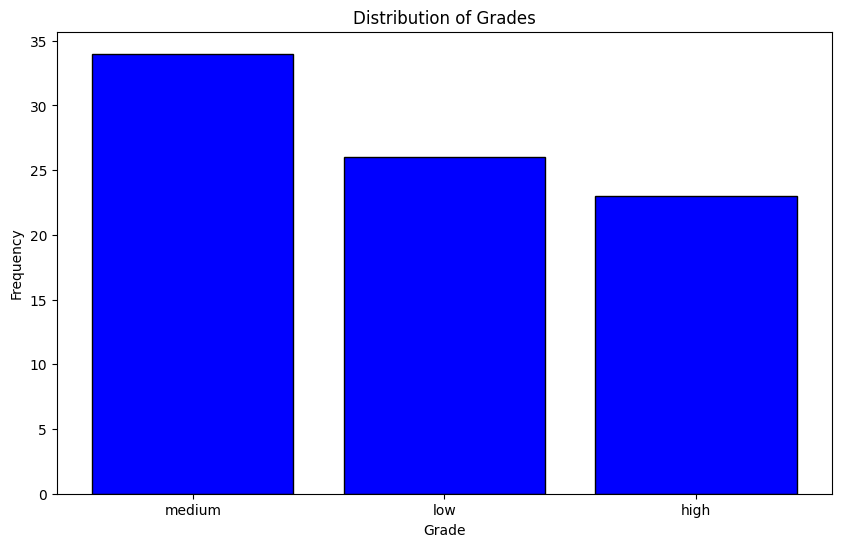

In [12]:
grade_counts = milk['Grade'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(grade_counts.index, grade_counts.values, color='blue', edgecolor='black')
# Add titles and labels
plt.title('Distribution of Grades')
plt.xlabel('Grade')
plt.ylabel('Frequency')

# Show the plot
plt.show()

From the above graph,
we can say that,the quality of milk are mostly in medium

Crosstab for Taste:
Taste    0   1
Grade         
high     7  16
low     13  13
medium  22  12



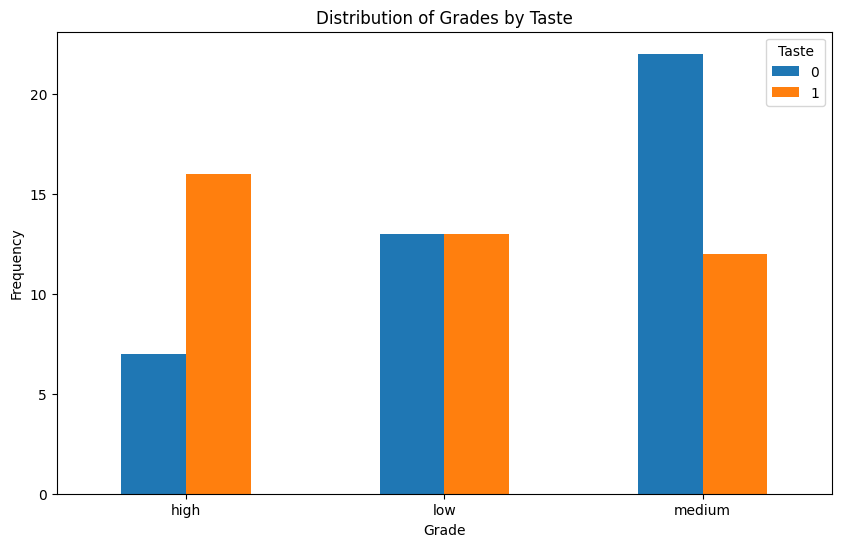

Crosstab for Odor:
Odor     0   1
Grade         
high     7  16
low     14  12
medium  29   5



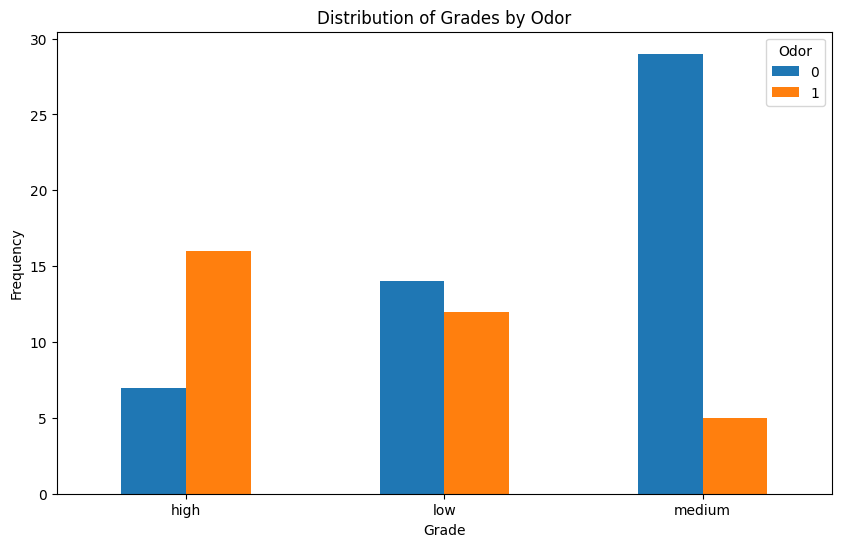

Crosstab for Turbidity:
Turbidity   0   1
Grade            
high        9  14
low        10  16
medium     28   6



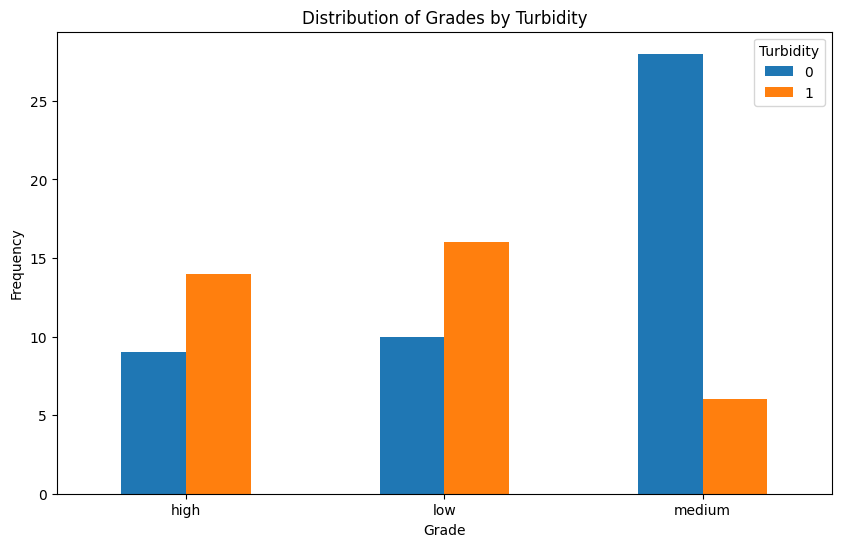

In [13]:
# List of columns to create bar plots for
cols = ['Taste', 'Odor',  'Turbidity']

# Iterate through each column and create bar plots
for col in cols:
    # Create a crosstab of Grade vs. the current column
    crosstab = pd.crosstab(milk['Grade'], milk[col])
    print(f"Crosstab for {col}:\n{crosstab}\n")  # Display crosstab

    # Plot the crosstab as a bar plot
    crosstab.plot(kind='bar', figsize=(10, 6), legend=True)

    # Customize the plot
    plt.title(f'Distribution of Grades by {col}')
    plt.xlabel('Grade')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    plt.legend(title=col)
    plt.show()

**Applying Encoding Techniques**

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
label_encoder=LabelEncoder()
ordinal_encoder=OrdinalEncoder()

In [15]:
milk['Grade']=ordinal_encoder.fit_transform(milk[['Grade']])

In [16]:
milk.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0.0
1,6.6,36,0,1,0,1,253,0.0
2,8.5,70,1,1,1,1,246,1.0
3,9.5,34,1,1,0,1,255,1.0
4,6.6,37,0,0,0,0,255,2.0


**Logistic Regression**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
#selecting the features
x=milk.iloc[:,0:-1]
y=milk.iloc[:,-1]

In [28]:
# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and Train the Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)



Mean Squared Error: 0.9411764705882353
Accuracy: 0.5882352941176471


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with selected features: {accuracy}')


Accuracy with selected features: 0.5882352941176471


In [21]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train, y_train)

# Make Predictions
y_pred = model1.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

# Make Predictions
y_pred = model.predict(X_test)


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with selected features: {accuracy}')


Mean Squared Error: 0.35153819435701433
Accuracy with selected features: 0.5882352941176471


**Random Forest Classifier**

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_pred = rf_classifier.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8235294117647058


**Decesion Tree Classifier**

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7647058823529411


**Conclusion**
From the above process


*   In all the machine learning classification models,the accuracy of model were in positive

* Among all classifiers,random forest classifier were classify the data precisely

